# Домашняя работа. Деревья решений.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](99-extra__ml-course-msu-Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_digits
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv.gz to winequality-red.csv.gz


### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'./data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [ ]:
data = pd.read_csv('winequality-red.csv.gz', compression='gzip', sep=';')
print("Первые строки данных:")
print(data.head())
print("\nНазвания столбцов:")
print(data.columns)


Первые строки данных:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

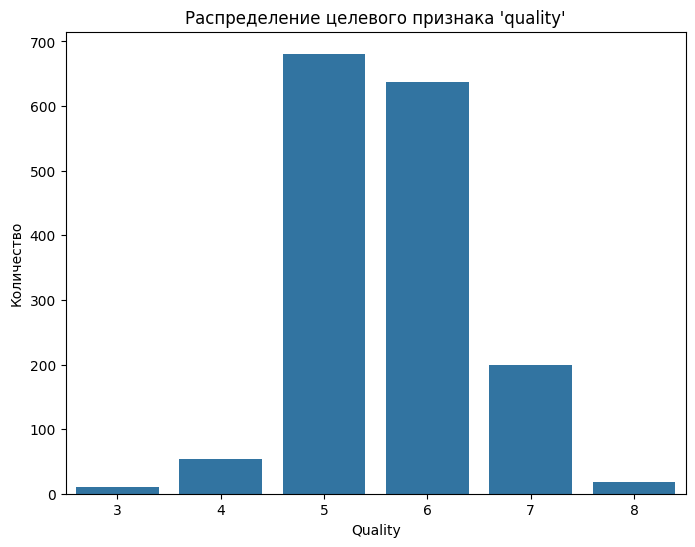

Количество представителей каждого класса:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title("Распределение целевого признака 'quality'")
plt.xlabel("Quality")
plt.ylabel("Количество")
plt.show()
print("Количество представителей каждого класса:")
print(data['quality'].value_counts())
X = data.drop(columns=['quality'])
y = data['quality']


### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов.

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [ ]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=10)
scores_knn = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
print("Среднее значение accuracy для KNeighborsClassifier с 10 соседями: {:.6f}, Std: {:.6f}".format(scores_knn.mean(), scores_knn.std()))


Среднее значение accuracy для KNeighborsClassifier с 10 соседями: 0.512220, Std: 0.026461


In [ ]:
pipeline_knn_scaled = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))
scores_knn_scaled = cross_val_score(pipeline_knn_scaled, X, y, cv=cv, scoring='accuracy')
print("Среднее значение accuracy для KNeighborsClassifier с 10 соседями и масштабированием: {:.6f}, Std: {:.6f}".format(scores_knn_scaled.mean(), scores_knn_scaled.std()))

Среднее значение accuracy для KNeighborsClassifier с 10 соседями и масштабированием: 0.581634, Std: 0.019192


In [ ]:
ridge = RidgeClassifier(random_state=42)
scores_ridge = cross_val_score(ridge, X, y, cv=cv, scoring='accuracy')
print("Среднее значение accuracy для RidgeClassifier: {:.6f}, Std: {:.6f}".format(scores_ridge.mean(), scores_ridge.std()))


Среднее значение accuracy для RidgeClassifier: 0.583538, Std: 0.039966


In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
scores_decision_tree = cross_val_score(decision_tree, X, y, cv=cv, scoring='accuracy')
print("Среднее значение accuracy для DecisionTreeClassifier: {:.6f}, Std: {:.6f}".format(scores_decision_tree.mean(), scores_decision_tree.std()))


Среднее значение accuracy для DecisionTreeClassifier: 0.617896, Std: 0.033631


In [ ]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
scores_bagging = cross_val_score(bagging, X, y, cv=cv, scoring='accuracy')
print("Среднее значение accuracy для BaggingClassifier с 100 деревьями: {:.6f}, Std: {:.6f}".format(scores_bagging.mean(), scores_bagging.std()))

Среднее значение accuracy для BaggingClassifier с 100 деревьями: 0.697966, Std: 0.035447


In [ ]:
bagging_half_features = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, max_features=0.5, random_state=42)
scores_bagging_half_features = cross_val_score(bagging_half_features, X, y, cv=cv, scoring='accuracy')
print("Среднее значение accuracy для BaggingClassifier с 100 деревьями и половиной признаков: {:.6f}, Std: {:.6f}".format(scores_bagging_half_features.mean(), scores_bagging_half_features.std()))

Среднее значение accuracy для BaggingClassifier с 100 деревьями и половиной признаков: 0.694835, Std: 0.022539


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
scores_random_forest = cross_val_score(random_forest, X, y, cv=cv, scoring='accuracy')
print("Среднее значение accuracy для RandomForestClassifier с 100 деревьями: {:.6f}, Std: {:.6f}".format(scores_random_forest.mean(), scores_random_forest.std()))

Среднее значение accuracy для RandomForestClassifier с 100 деревьями: 0.701714, Std: 0.028722


### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

1)Почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без?
Ответ:
KNeighborsClassifier чувствителен к масштабам признаков, так как он вычисляет расстояния между точками. Без масштабирования признаки с большим масштабом могут доминировать над признаками с меньшим масштабом, что негативно сказывается на качестве модели. Масштабирование позволяет каждому признаку вносить равный вклад в метрику расстояния, что приводит к более точной классификации.

2)Почему масштабирование не важно для деревьев решений?
Ответ:
Деревья решений не зависят от масштаба признаков, так как они строятся на основе пороговых разбиений по каждому признаку. Поскольку модель выбирает оптимальные пороги независимо от масштаба, изменение масштаба признаков не оказывает влияния на структуру дерева и, следовательно, на его качество.

3)У какой модели наибольшей отклонение от среднего качества предсказаний?А почему?
Ответ:s
RidgeClassifier — это линейная модель, которая может быть более чувствительна к особенностям выборки и разделений данных на фолды, особенно если данные имеют определенные корреляции или вариативность. В отличие от ансамблевых методов, которые могут компенсировать часть этой вариативности за счет усреднения результатов нескольких моделей, линейные классификаторы иногда показывают больший разброс в результатах на различных подвыборках, что и приводит к повышенному стандартному отклонению.

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

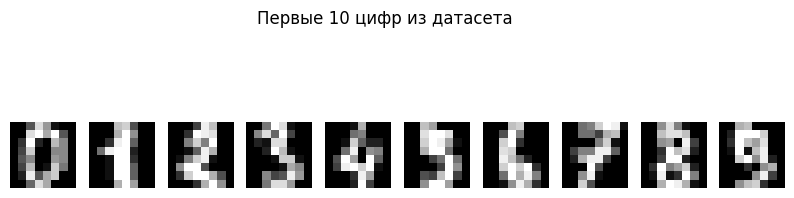

In [ ]:
digits = load_digits()
plt.figure(figsize=(10, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Первые 10 цифр из датасета")
plt.show()


### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
scores_decision_tree = cross_val_score(decision_tree, X, y, cv=10, scoring='accuracy')
print("Среднее значение accuracy для DecisionTreeClassifier:", scores_decision_tree.mean())


Среднее значение accuracy для DecisionTreeClassifier: 0.4777830188679245


In [ ]:
bagging = BaggingClassifier(n_estimators=100, random_state=42)
scores_bagging = cross_val_score(bagging, X, y, cv=10, scoring='accuracy')
print("Среднее значение accuracy для BaggingClassifier с 100 деревьями:", scores_bagging.mean())


Среднее значение accuracy для BaggingClassifier с 100 деревьями: 0.5578301886792453


In [ ]:
num_features = X.shape[1]
bagging_max_features = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(num_features)), random_state=42)
scores_bagging_max_features = cross_val_score(bagging_max_features, X, y, cv=10, scoring='accuracy')
print("Среднее значение accuracy для BaggingClassifier с 100 деревьями и ограничением на max_features:", scores_bagging_max_features.mean())


Среднее значение accuracy для BaggingClassifier с 100 деревьями и ограничением на max_features: 0.5603380503144655


In [ ]:
bagging_split_features = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_features=int(np.sqrt(num_features)), random_state=42),
    n_estimators=100,
    random_state=42
)
scores_bagging_split_features = cross_val_score(bagging_split_features, X, y, cv=10, scoring='accuracy')
print("Среднее значение accuracy для BaggingClassifier с 100 деревьями и ограничением max_features в разбиениях деревьев:", scores_bagging_split_features.mean())


Среднее значение accuracy для BaggingClassifier с 100 деревьями и ограничением max_features в разбиениях деревьев: 0.5697366352201257


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
scores_random_forest = cross_val_score(random_forest, X, y, cv=10, scoring='accuracy')
print("Среднее значение accuracy для RandomForestClassifier с 100 деревьями:", scores_random_forest.mean())


Среднее значение accuracy для RandomForestClassifier с 100 деревьями: 0.5734905660377358


### 2.3 В чём разница? (3 балла)

Ответье на вопрос:

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

Когда мы ограничиваем max_features внутри дерева, каждое дерево смотрит только на случайное подмножество признаков на каждом шаге. Это делает деревья более разнообразными. Но если признаков слишком мало, дерево может не видеть важных паттернов в данных и строиться хуже.

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

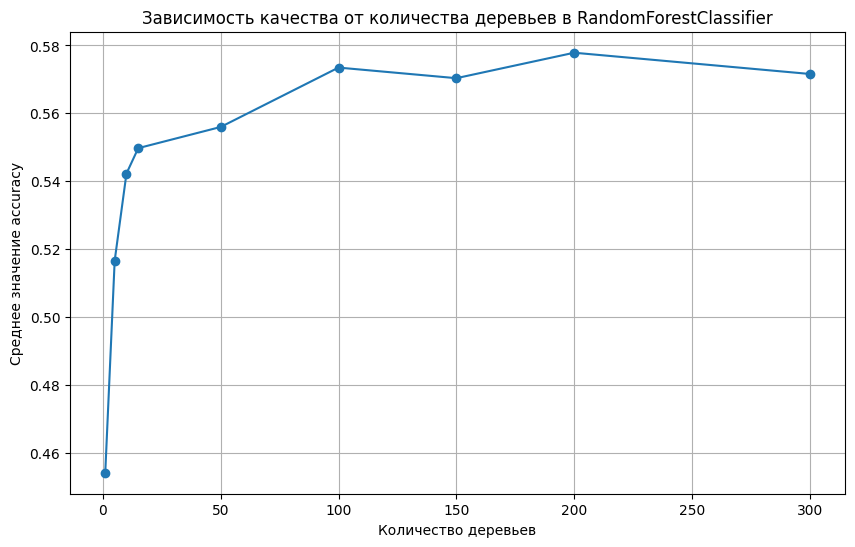

Оптимальное количество деревьев: 200, при котором accuracy = 0.5778694968553459


In [ ]:
n_estimators_options = [1, 5, 10, 15, 50, 100, 150, 200, 300]
mean_accuracies = []
for n in n_estimators_options:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
    mean_accuracies.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_options, mean_accuracies, marker='o')
plt.xlabel("Количество деревьев")
plt.ylabel("Среднее значение accuracy")
plt.title("Зависимость качества от количества деревьев в RandomForestClassifier")
plt.grid(True)
plt.show()

best_n_estimators = n_estimators_options[np.argmax(mean_accuracies)]
best_accuracy = max(mean_accuracies)
print(f"Оптимальное количество деревьев: {best_n_estimators}, при котором accuracy = {best_accuracy}")


### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

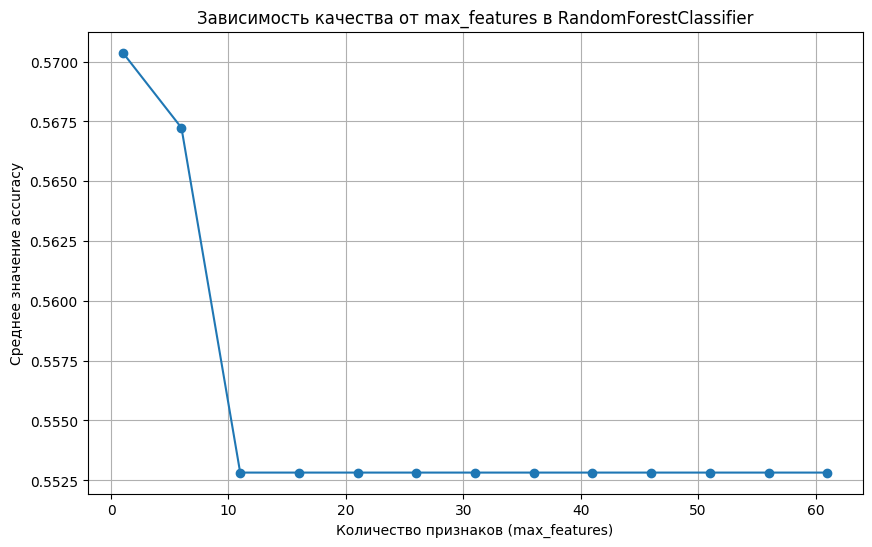

Оптимальное количество признаков: 1, при котором accuracy = 0.570377358490566


In [ ]:
max_features_options = list(range(1, 65, 5))
mean_accuracies = []

for max_features in max_features_options:
    rf = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42)
    scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
    mean_accuracies.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(max_features_options, mean_accuracies, marker='o')
plt.xlabel("Количество признаков (max_features)")
plt.ylabel("Среднее значение accuracy")
plt.title("Зависимость качества от max_features в RandomForestClassifier")
plt.grid(True)
plt.show()
best_max_features = max_features_options[np.argmax(mean_accuracies)]
best_accuracy = max(mean_accuracies)
print(f"Оптимальное количество признаков: {best_max_features}, при котором accuracy = {best_accuracy}")


### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?

С увеличением числа деревьев случайный лес
становится стабильние, то есть предсказания становятся менее подвержены случайным ошибкам, а переобучение снижается. Использование слишком большого количества деревьев значительно увеличивает вычислительные затраты без существенного прироста точности, поэтому лучше подобрать оптимальное количество деревьев.

- Как зависит качество предсказания в дереве в зависимости от max_features?

max_features - сколько признаков доступно каждому дереву для выбора на каждом разбиении. Если выбрать слишком мало признаков, деревья будут хуже "понимать" данные, и качество упадет. Если выбрать слишком много, деревья могут стать похожими друг на друга, и случайный лес потеряет свою силу.

- Почему качество зависит от max_features?

Значение max_features влияет на качество предсказания, поскольку оно контролирует степень разнообразия деревьев в лесу. Если признаков мало, модель недоиспользует данные, и ее способность предсказывать ухудшается. Если признаков много, деревья начинают сильно коррелировать, то есть быть похожими, и случайный лес теряет свою устойчивость.

- Как глубина деревьев влияет на качество случайного леса?

Глубина деревьев определяет, насколько сильно каждое дерево может подстраиваться под данные. Слишком маленькая глубина: деревья не могут захватить сложные зависимости в данных, качество низкое. Слишком большая глубина: деревья переобучаются на обучающей выборке (запоминают шум), а случайный лес работает хуже на новых данных.